# Mini Project III

# Identify the customers segments,who are eligible for Home loan ?


__Validates customer eligibility of home loan for house which are present across urban, semi urban and rural area, based on the significant features to make loan approval for potential customer?__



# SUMMARY

__Problem Statement__

1.Housing Finance company which provide home loans for the houses that are present across all urban, semiurban and rural areas for their valued customers.

2.The company validates the eligibility of loan after customer applies for the loan. However, it consumes lot of time for the manual validation of eligibility process.

3.Hence, the company wants to automate the loan elibility process based on the customer information and identify the factors/customer segments who are eligible for taking the loan.

4.As banks would give loans to only those customers who are eligible so that they can be assured of getting the money back.

5.Hence, the more accurate we are in predicting the eligible customers, the more beneficial it would be for the company.

# Industry/ domain   :  Banking

# __Stakeholders__

Housing Finance company

# __Business Question__

Identify the customers segments,who are eligible for loan amount ?

# __Data Question__

Validates customer eligibility of home loan for house which are present across urban, semi urban and rural area, based on the significant features to make loan approval for potential customer?

# __Data__

__Variable ----- Description__

Loan_ID -->> Unique Loan ID

Gender -->> Male/ Female

Married -->> Applicant married (Y/N)

Dependents -->> Number of dependents

Education -->> Applicant Education (Graduate/ Under Graduate)

Self_Employed -->> Self employed (Y/N)

ApplicantIncome -->> Applicant income

CoapplicantIncome -->> Coapplicant income

LoanAmount -->> Loan amount in thousands

Loan_Amount_Term -->> Term of loan in months

Credit_History -->> credit history meets guidelines

Property_Area -->> Urban/ Semi Urban/ Rural

Loan_Status -->> Loan approved (Y/N)

Data obtained fron __data.world and Kaggle__

__Dataset:__

Rows: 614

Columns: 24

Duplicated rows: 0

Column names to reformat: 0

Numerical columns: 10

catagorical columns: 14

Missing value columns: 7

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
%matplotlib inline

In [2]:
data=pd.read_csv("../.../../Data/Train_Loan_Home.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Data Analysing (EDA)

In [3]:
data.shape

(614, 13)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
data.duplicated().sum()

0

In [6]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP002888,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614,NaN,NaN,NaN,5403.46,6109.04,150,2877.5,3812.5,5795,81000
CoapplicantIncome,614,NaN,NaN,NaN,1621.25,2926.25,0,0,1188.5,2297.25,41667
LoanAmount,592,NaN,NaN,NaN,146.412,85.5873,9,100,128,168,700
Loan_Amount_Term,600,NaN,NaN,NaN,342,65.1204,12,360,360,360,480


In [7]:
Loan_ID=data['Loan_ID']

In [8]:
data=data.drop('Loan_ID',axis=1)

In [9]:
data.describe(include='object')

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


In [10]:
data.describe(include='float64')

,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,592.000000,600.00000,564.000000
mean,1621.245798,146.412162,342.00000,0.842199
std,2926.248369,85.587325,65.12041,0.364878
min,0.000000,9.000000,12.00000,0.000000
25%,0.000000,100.000000,360.00000,1.000000
50%,1188.500000,128.000000,360.00000,1.000000
75%,2297.250000,168.000000,360.00000,1.000000
max,41667.000000,700.000000,480.00000,1.000000


In [11]:
cat_cols=data.dtypes=='object'
cat_cols=list(cat_cols[cat_cols].index)
data[cat_cols]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,Urban,Y
1,Male,Yes,1,Graduate,No,Rural,N
2,Male,Yes,0,Graduate,Yes,Urban,Y
3,Male,Yes,0,Not Graduate,No,Urban,Y
4,Male,No,0,Graduate,No,Urban,Y
...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,Rural,Y
610,Male,Yes,3+,Graduate,No,Rural,Y
611,Male,Yes,1,Graduate,No,Urban,Y
612,Male,Yes,2,Graduate,No,Urban,Y


In [13]:
num_cols=data.dtypes!='object'
num_cols=list(num_cols[num_cols].index)
data[num_cols]

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,NaN,360.0,1.0
1,4583,1508.0,128.0,360.0,1.0
2,3000,0.0,66.0,360.0,1.0
3,2583,2358.0,120.0,360.0,1.0
4,6000,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0
610,4106,0.0,40.0,180.0,1.0
611,8072,240.0,253.0,360.0,1.0
612,7583,0.0,187.0,360.0,1.0


# Missing data/Data cleaing

In [14]:
data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [16]:
all_cols = list(data.columns)
missing_cols = [col for col in all_cols if data[col].isnull().any()]
len(missing_cols)

7

There 7 columns with missing values

Missing in credit history might mean the credit history of the clients are not available. Fill the missing data with 2 means the data aren't available.

In [17]:
data['Credit_History']=data['Credit_History'].fillna(2)

Missing in self employed can mean a person is not in labor force or retired. So, we give a new categorical to those people.

In [18]:
data['Self_Employed']=data['Self_Employed'].fillna('other')

There are outliers in Loan Amount (maximum value is 700 and Q3 is 162), so the missing value in this column will be filled with median. The remaining columns with missing values will be filled by median value as well. There size are relatively small, it's safe to do so.

In [19]:
from sklearn.impute import SimpleImputer
median_imputer=SimpleImputer(strategy='median')
#median_imputer.fit_transform(x['LoanAmount'])
num_missing=['LoanAmount','Loan_Amount_Term']
for col in num_missing:
    data[col] = pd.DataFrame(median_imputer.fit_transform(pd.DataFrame(data[col])))

In [20]:
freq_imputer=SimpleImputer(strategy='most_frequent')
cat_missing = ['Gender', 'Married','Dependents']
for col in cat_missing:
    data[col] = pd.DataFrame(freq_imputer.fit_transform(pd.DataFrame(data[col])))

In [21]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Visualization

Target varibale is Loan_Status.

In [22]:
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

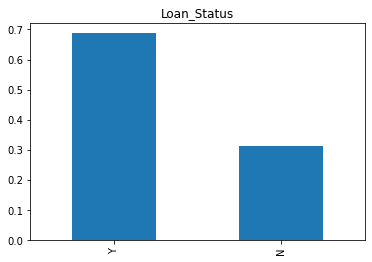

In [23]:
data["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

The loan of 422(around 69%) people out of 614 was approved.

__Visualise each variable seperately with Loan_Status__

Catagorical Variables

Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


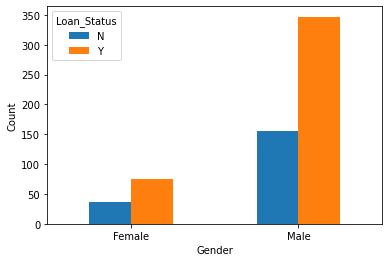

In [24]:
print(pd.crosstab(data["Gender"],data["Loan_Status"]))
Gender = pd.crosstab(data["Gender"],data["Loan_Status"])
#Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Gender.plot.bar(rot=0)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Number of Female whose Loan was approed : 75

Number of Male whose Loan was approed : 347

Number of Female whose Loan was not approed : 37

Number of Male whose Loan was not approed : 155

Proportion of Male applicants is higher for the approved loan

Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


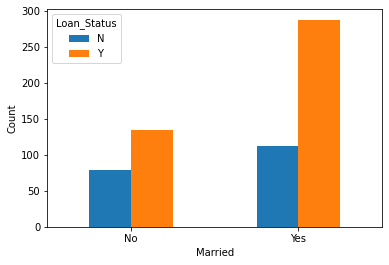

In [25]:
print(pd.crosstab(data["Married"],data["Loan_Status"]))
Married=pd.crosstab(data["Married"],data["Loan_Status"])
#Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Married.plot.bar(rot=0)
plt.xlabel("Married")
plt.ylabel("Count")
plt.show()

Number of married people whose Loan was approed : 288

Number of married people whose Loan was not approed : 113

Number of unmarried people whose Loan was approed : 134

Number of unmarried people whose Loan was not approed : 79

Proportion of Married applicants is higher for the approved loans.

Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


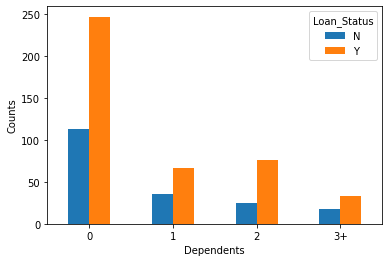

In [26]:
print(pd.crosstab(data['Dependents'],data["Loan_Status"]))
Dependents = pd.crosstab(data['Dependents'],data["Loan_Status"])
#Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Dependents.plot.bar(rot=0)
plt.xlabel("Dependents")
plt.ylabel("Counts")
plt.show()

Number of dependents on the loan applicant : 0 and Loan was approed : 247

Number of dependents on the loan applicant : 0 and Loan was not approed : 113

Number of dependents on the loan applicant : 1 and Loan was approed : 66

Number of dependents on the loan applicant : 1 and Loan was not approed : 36

Number of dependents on the loan applicant : 2 and Loan was approed : 76

Number of dependents on the loan applicant : 2 and Loan was not approed : 25

Number of dependents on the loan applicant : 3+ and Loan was approed : 33

Number of dependents on the loan applicant : 3+ and Loan was not approed : 18

Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


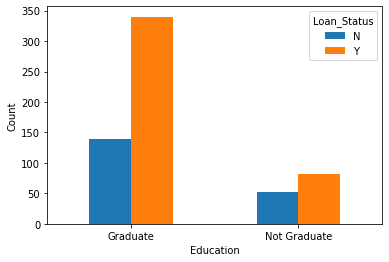

In [27]:
print(pd.crosstab(data["Education"],data["Loan_Status"]))
Education = pd.crosstab(data["Education"],data["Loan_Status"])
#Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Education.plot.bar(rot=0)
plt.xlabel("Education")
plt.ylabel("Count")
plt.show()

Number of people who are Graduate and Loan was approed : 340

Number of people who are Graduate and Loan was no approed : 140

Number of people who are Not Graduate and Loan was approed : 82

Number of people who are Not Graduate and Loan was not approed : 52

Proportion of Graduate applicants is higher for the approved loans.

Loan_Status      N    Y
Self_Employed          
No             157  343
Yes             26   56
other            9   23


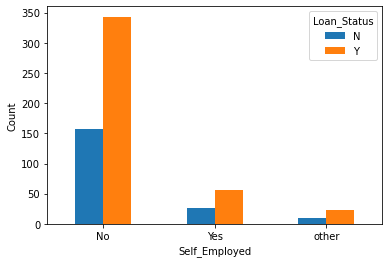

In [28]:
print(pd.crosstab(data["Self_Employed"],data["Loan_Status"]))
SelfEmployed = pd.crosstab(data["Self_Employed"],data["Loan_Status"])
#SelfEmployed.div(SelfEmployed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
SelfEmployed.plot.bar(rot=0)
plt.xlabel("Self_Employed")
plt.ylabel("Count")
plt.show()

People who are Self_Employed and Loan was approed : 56

People who are Self_Employed and Loan was not approed : 26

People who are not Self_Employed and Loan was approed : 343

People who are not Self_Employed and Loan was not approed : 157

There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

Loan_Status      N    Y
Credit_History         
0.0             82    7
1.0             97  378
2.0             13   37


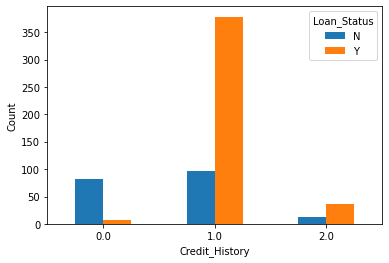

In [29]:
print(pd.crosstab(data["Credit_History"],data["Loan_Status"]))
CreditHistory = pd.crosstab(data["Credit_History"],data["Loan_Status"])
#CreditHistory.div(CreditHistory.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
CreditHistory.plot.bar(rot=0)
plt.xlabel("Credit_History")
plt.ylabel("Count")
plt.show()

People with credit history as 1 and loan was approved : 378

People with credit history as 1 and loan was not approved : 97

People with credit history as 0 and loan was approved : 7

People with credit history as 0 and loan was not approved : 82

It seems people with credit history as 1 are more likely to get their loans approved.

Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133


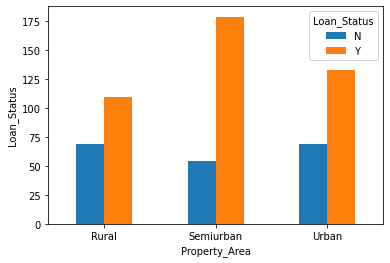

In [30]:
print(pd.crosstab(data["Property_Area"],data["Loan_Status"]))
PropertyArea = pd.crosstab(data["Property_Area"],data["Loan_Status"])
#PropertyArea.div(PropertyArea.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
PropertyArea.plot.bar(rot=0)
plt.xlabel("Property_Area")
plt.ylabel("Loan_Status")
plt.show()

People who are from Rural area and loan was approved : 110

People who are from Rural area and loan was not approved : 69

People who are from Semiurban area and loan was approved : 179

People who are from Semiurban area and loan was not approved : 54

People who are from Urban area and loan was approved : 133

People who are from Semiurban area and loan was not approved : 69

Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas.

__Numerical Variable__

We will try to find the mean income of people for which the loan has been approved vs the mean income of people for which the loan has not been approved.

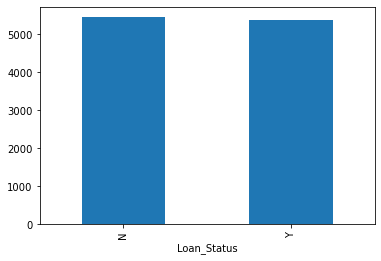

In [31]:
data.groupby("Loan_Status")['ApplicantIncome'].mean().plot.bar()

Here the y-axis represents the mean applicant income. We don’t see any change in the mean income. So, let’s make bins for the applicant income variable based on the values in it and analyze the corresponding loan status for each bin.

In [32]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)

Loan_Status   N    Y
Income_bin          
Low          34   74
Average      67  159
High         45   98
Very high    46   91


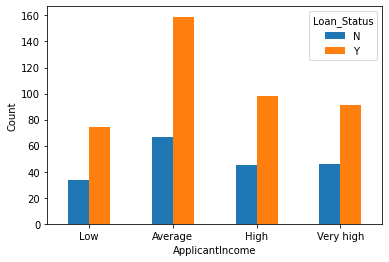

In [33]:
print(pd.crosstab(data["Income_bin"],data["Loan_Status"]))
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"])
#Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Income_bin.plot.bar(rot=0)
plt.xlabel("ApplicantIncome")
plt.ylabel("Count")
plt.show()

In [34]:
bins=[0,1000,3000,42000]
group =['Low','Average','High']
data['CoapplicantIncome_bin']=pd.cut(data["CoapplicantIncome"],bins,labels=group)

Loan_Status             N    Y
CoapplicantIncome_bin         
Low                     3   19
Average                61  161
High                   32   65


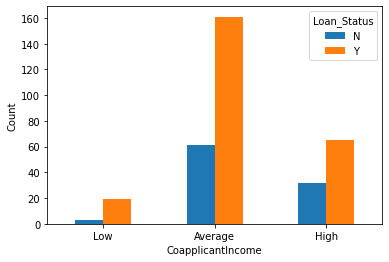

In [35]:
print(pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"]))
CoapplicantIncome_Bin = pd.crosstab(data["CoapplicantIncome_bin"],data["Loan_Status"])
#CoapplicantIncome_Bin.div(CoapplicantIncome_Bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
CoapplicantIncome_Bin.plot.bar(rot=0)
plt.xlabel("CoapplicantIncome")
plt.ylabel("Count")
plt.show()

Make a new variable in which we will combine the applicant’s and coapplicant’s income to visualize the combined effect of income on loan approval.

In [36]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

In [37]:
bins =[0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
data["TotalIncome_bin"]=pd.cut(data["TotalIncome"],bins,labels=group)

Loan_Status       N    Y
TotalIncome_bin         
Low              14   10
Average          32   87
High             65  159
Very High        81  166


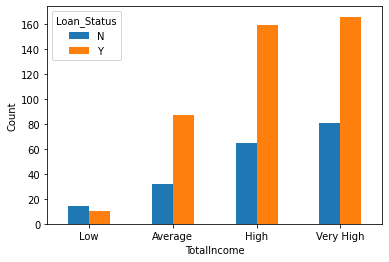

In [38]:
print(pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"]))
TotalIncome = pd.crosstab(data["TotalIncome_bin"],data["Loan_Status"])
#TotalIncome.div(TotalIncome.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
TotalIncome.plot.bar(rot=0)
plt.xlabel("TotalIncome")
plt.ylabel("Count")
plt.show()

Whose TotalIncome was Low and loan was approved : 10

Whose TotalIncome was Low and loan was not approved : 14

Whose TotalIncome was Aerage and loan was apprvoed : 87

Whose TotalIncome was Average and loan was not approved : 32

Whose TotalIncome was High and loan was approved : 159

Whose TotalIncome was High and loan was not approved : 65

Whose TotalIncome was Very High and loan was approved : 166

Whose TotalIncome was Very High and loan was not approed : 81

We can see that Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

In [39]:
bins = [0,100,200,700]
group=['Low','Average','High']
data["LoanAmount_bin"]=pd.cut(data["LoanAmount"],bins,labels=group)

Loan_Status       N    Y
LoanAmount_bin          
Low              47  107
Average         114  266
High             31   49


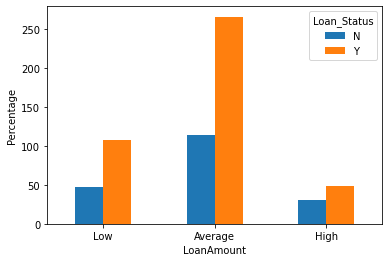

In [40]:
print(pd.crosstab(data["LoanAmount_bin"],data["Loan_Status"]))
LoanAmount=pd.crosstab(data["LoanAmount_bin"],data["Loan_Status"])
#LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',figsize=(4,4))
LoanAmount.plot.bar(rot=0)
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Whose Loan Amount was low and Loan was approved : 107

Whose Loan Amount was low and Loan was not approved : 47

Whose Loan Amount was Average and Loan was approved : 266

Whose Loan Amount was Average and Loan was not approved : 114

Whose Loan Amount was High and Loan was approved : 39

Whose Loan Amount was High and Loan was not approved : 31

It can be seen that the proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.



In [41]:
bins = [0,100,200,500]
group=['Low','Average','High']
data["LoanAmountterm_bin"]=pd.cut(data["Loan_Amount_Term"],bins,labels=group)

Loan_Status           N    Y
LoanAmountterm_bin          
Low                   3    6
Average              15   32
High                174  384


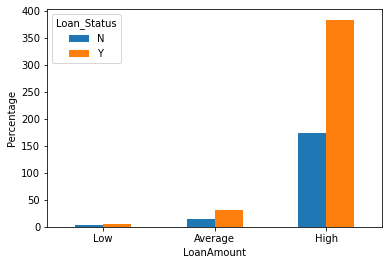

In [42]:
print(pd.crosstab(data["LoanAmountterm_bin"],data["Loan_Status"]))
LoanAmount=pd.crosstab(data["LoanAmountterm_bin"],data["Loan_Status"])
#LoanAmount.div(LoanAmount.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
LoanAmount.plot.bar(rot=0)
plt.xlabel("LoanAmount")
plt.ylabel("Percentage")
plt.show()

Loan Amount term  does not affect the chances of loan approval 

In [43]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,CoapplicantIncome_bin,TotalIncome,TotalIncome_bin,LoanAmount_bin,LoanAmountterm_bin
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,High,NaN,5849.0,High,Average,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High,Average,6091.0,Very High,Average,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,NaN,3000.0,Average,Low,High
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,Average,4941.0,High,Average,High
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High,NaN,6000.0,High,Average,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,Average,NaN,2900.0,Average,Low,High
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,High,NaN,4106.0,High,Low,Average
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,Very high,Low,8312.0,Very High,High,High
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,Very high,NaN,7583.0,Very High,Average,High


In [44]:
data=data.drop(["Income_bin","CoapplicantIncome_bin","LoanAmount_bin","TotalIncome","TotalIncome_bin"],axis=1)

In [45]:
data=data.drop(['LoanAmountterm_bin'],axis=1)

In [46]:
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


Find out whether a certain demographic is more likely to get approved compared to others.
The dataset was truncated to create a dataset centered around gender and education. In order to compare the demographics perfectly well, pie charts were used to explore these newly-formed dataset.


In [47]:
data1=data[['Gender','Education']]
data1=pd.concat([data1,pd.get_dummies(data['Loan_Status'])],axis=1)

In [48]:
data1['Demographic']=data1['Gender'].str.cat(data1['Education'],sep=',')
data1.head()

,Gender,Education,N,Y,Demographic
0,Male,Graduate,0,1,"Male,Graduate"
1,Male,Graduate,1,0,"Male,Graduate"
2,Male,Graduate,0,1,"Male,Graduate"
3,Male,Not Graduate,0,1,"Male,Not Graduate"
4,Male,Graduate,0,1,"Male,Graduate"


In [49]:
data2 = data1['Demographic'].value_counts().to_frame()
data2.rename(columns={'Demographic': 'Frequency'}, inplace=True)
data2.index.name = "Demographic"
data2.head()

,Frequency
Demographic,
"Male,Graduate",388
"Male,Not Graduate",114
"Female,Graduate",92
"Female,Not Graduate",20


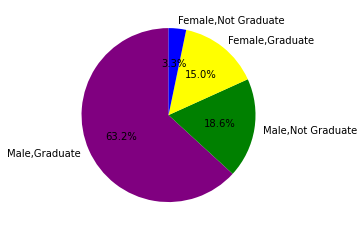

In [50]:
demo = data2.index
freq = data2['Frequency']
colors = ['purple', 'green', 'yellow', 'blue']
plt.pie(freq, labels=demo, colors=colors, startangle=90, autopct='%.1f%%')
plt.show()

This pie chat shows that male graduates are more likely to apply for a loan compared to the other groups of people.

# Feature Engineering

Total Income - Combine the Applicant Income and Coapplicant Income. 
If the total income is high, chances of loan approval might also be high.

In [51]:
data["TotalIncome"]=data["ApplicantIncome"]+data["CoapplicantIncome"]

Label Encoding dependets that contain information in their ordering set.

Convert 3+ in depedents into 3, and convert the column into numeric feature.

In [52]:
data = data.replace({'Dependents': r'3+'}, {'Dependents': 3}, regex=True)

In [53]:
object_cols=list(['Gender','Married','Education','Self_Employed','Property_Area','Loan_Status'])
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
data

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1,2900.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1,4106.0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1,8312.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1,7583.0


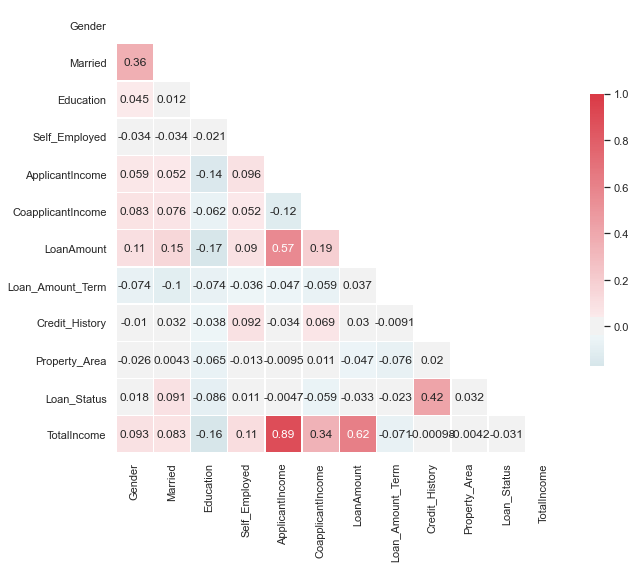

In [54]:
# https://seaborn.pydata.org/examples/many_pairwise_correlations.html
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(data.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data.corr(), mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show();

# Modelling

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Set terget variable

In [2]:
target='Loan_Status'
feature=[c for c in data.columns if c!='Loan_Status']
X=data[feature]
Y=data[target]

NameError: name 'data' is not defined

Train Test split for model Building

In [57]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=1)

x_train.shape, x_test.shape, y_train.shape, y_test.shape

((491, 12), (123, 12), (491,), (123,))

In [58]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,2900.0
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,4106.0
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,8312.0
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,7583.0


__Logistic Regression__

Accuracy is:  0.7804878048780488
              precision    recall  f1-score   support

           0       0.83      0.38      0.53        39
           1       0.77      0.96      0.86        84

    accuracy                           0.78       123
   macro avg       0.80      0.67      0.69       123
weighted avg       0.79      0.78      0.75       123



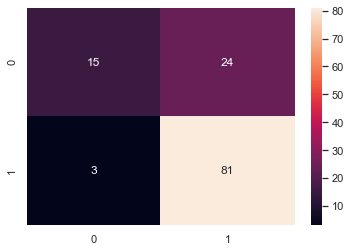

In [59]:
lg_model=LogisticRegression()
lg_model.fit(x_train,y_train)
score=lg_model.score(x_test,y_test)


y_pred=lg_model.predict(x_test)
log_ac = accuracy_score(y_test,y_pred)
print('Accuracy is: ',log_ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

__Support Vector Machines__

Accuracy is:  0.6747967479674797
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        39
           1       0.68      0.99      0.81        84

    accuracy                           0.67       123
   macro avg       0.34      0.49      0.40       123
weighted avg       0.46      0.67      0.55       123



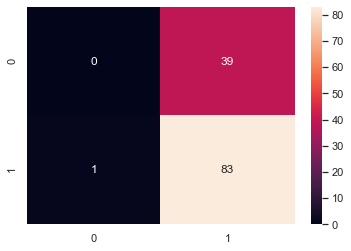

In [60]:
svc_model = SVC()
svc_model.fit(x_train, y_train)
svc_model.score(x_test, y_test)

y_pred = svc_model.predict(x_test)
svc_ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',svc_ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

__K-NEAREST NEIGHBOURS classification Models__

Accuracy is:  0.6829268292682927
              precision    recall  f1-score   support

           0       0.50      0.13      0.20        39
           1       0.70      0.94      0.80        84

    accuracy                           0.68       123
   macro avg       0.60      0.53      0.50       123
weighted avg       0.64      0.68      0.61       123



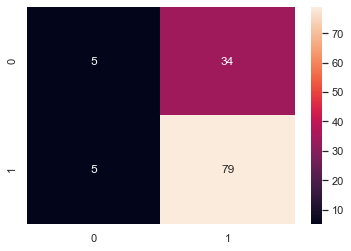

In [61]:
knn_model=KNeighborsClassifier(n_neighbors=13)
knn_model.fit(x_train,y_train)
knn_model.score(x_test,y_test)

y_pred = knn_model.predict(x_test)
knn_ac = accuracy_score(y_test, y_pred)
print('Accuracy is: ',knn_ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

__Decision Tree Model__

Accuracu score : 0.8048780487804879
              precision    recall  f1-score   support

           0       0.94      0.41      0.57        39
           1       0.78      0.99      0.87        84

    accuracy                           0.80       123
   macro avg       0.86      0.70      0.72       123
weighted avg       0.83      0.80      0.78       123



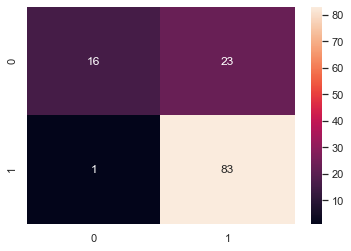

In [62]:
dt_model=DecisionTreeClassifier(criterion='entropy',max_depth=4)
dt_model.fit(x_train,y_train)
dt_model.score(x_test,y_test)

y_pred1=dt_model.predict(x_test)
ac1=accuracy_score(y_test,y_pred1)
print("Accuracu score :",ac1)

cm=confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)
print(classification_report(y_test, y_pred1))

__Random Forest Model__

Accuracy is: 0.7804878048780488
              precision    recall  f1-score   support

           0       0.80      0.41      0.54        39
           1       0.78      0.95      0.86        84

    accuracy                           0.78       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.78      0.76       123



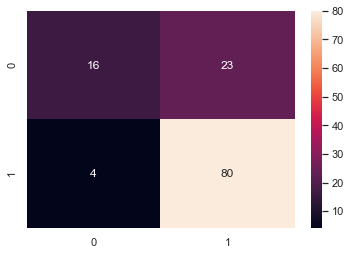

In [63]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)
random_forest.score(x_test,y_test)

y_pred = random_forest.predict(x_test)
ran_ac=accuracy_score(y_test,y_pred)
print('Accuracy is:',ran_ac)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm,annot=True,fmt="d");
print(classification_report(y_test, y_pred))

In [64]:
models=pd.DataFrame({'Model':['LogisticRegression','Support Vector Machine','Random foresst','Decission Tree','KNeibourgh'],'Score':[log_ac,svc_ac,ran_ac,ac1,knn_ac]})
models.sort_values(by='Score',ascending=False)

,Model,Score
3,Decission Tree,0.804878
0,LogisticRegression,0.780488
2,Random foresst,0.780488
4,KNeibourgh,0.682927
1,Support Vector Machine,0.674797


__Cross Vludation__

In [65]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
n_folds = 5

def rmsle_cv(model):
    #kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(train[selected_columns].values)
    rmse= (cross_val_score(model, x_test,y_test, scoring="f1", cv = 5))
    return(rmse)

In [66]:
#logisti regression
log_reg_score = rmsle_cv(lg_model)
print("\nLogistic Regression score: {:.4f} ({:.4f})\n".format(log_reg_score.mean(), log_reg_score.std()))

#Support Vector Machine
svc_score = rmsle_cv(svc_model)
print("\nSupport Vector Machines score: {:.4f} ({:.4f})\n".format(svc_score.mean(), svc_score.std()))

#KNeighbour Classification
knn_score = rmsle_cv(knn_model)
print("\nkNN score: {:.4f} ({:.4f})\n".format(knn_score.mean(), knn_score.std()))

#Decision Tree
decision_tree_score = rmsle_cv(dt_model)
print("\nDecision_tree score: {:.4f} ({:.4f})\n".format(decision_tree_score.mean(), decision_tree_score.std()))

#Random Forest
random_forest_score = rmsle_cv(random_forest)
print("\nRandom Forest score: {:.4f} ({:.4f})\n".format(random_forest_score.mean(), random_forest_score.std()))

C:\Users\SRIDHAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression score: 0.8144 (0.0352)


Support Vector Machines score: 0.8057 (0.0047)


kNN score: 0.7946 (0.0578)


Decision_tree score: 0.8386 (0.0293)


Random Forest score: 0.8322 (0.0342)



In [67]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest',  
              'Decision Tree'],
    'Mean_Score': [svc_score.mean(), knn_score.mean(), log_reg_score.mean(), 
              random_forest_score.mean(), 
             decision_tree_score.mean()]})
models.sort_values(by='Mean_Score', ascending=False)

,Model,Mean_Score
4,Decision Tree,0.838556
3,Random Forest,0.832238
2,Logistic Regression,0.814427
0,Support Vector Machines,0.805714
1,KNN,0.794601


__Decision tree has heighest score always__

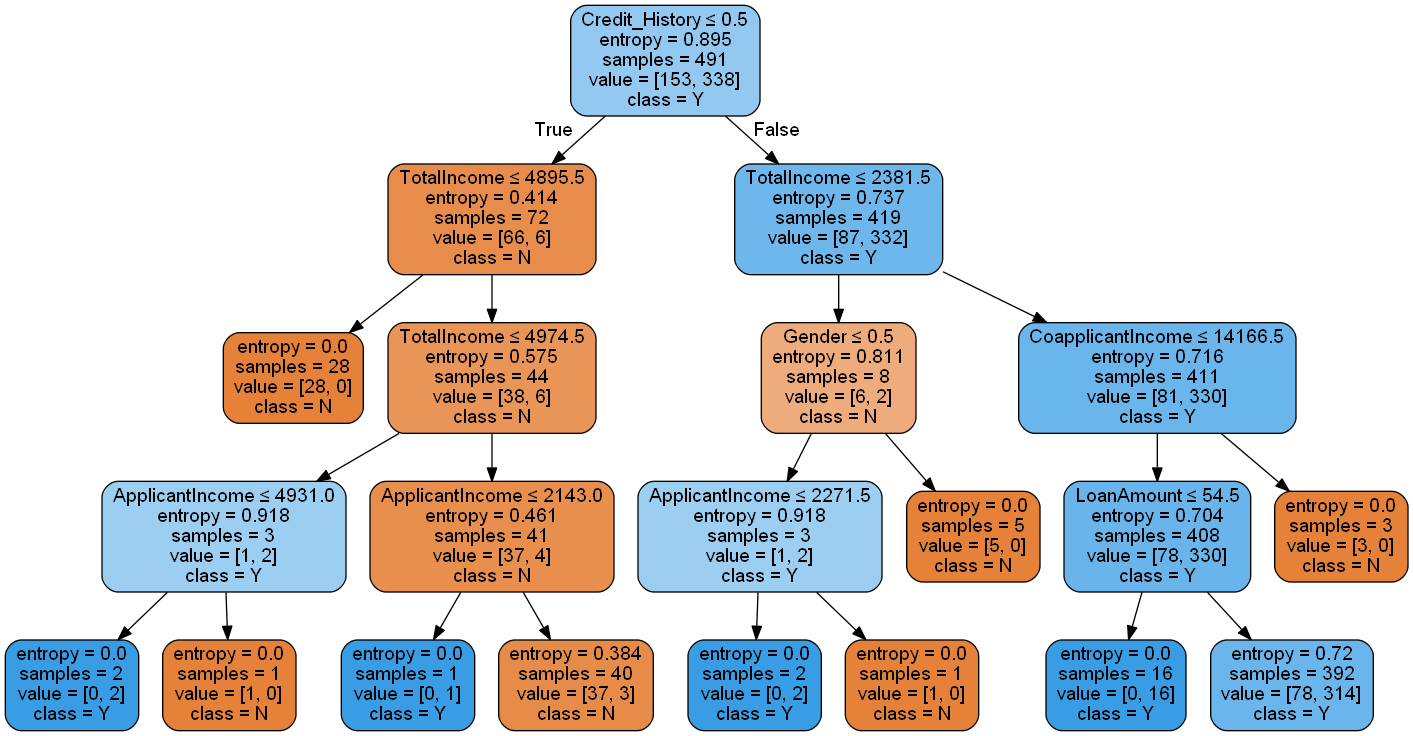

In [69]:
from sklearn import tree
import pydotplus
import os     
os.environ["PATH"] += os.pathsep + 'C:\\Users\\SRIDHAR\\anaconda3\\pkgs\\graphviz-2.38-hfd603c8_2\\Library\\bin\\graphviz'
from IPython.display import Image 
x_train = pd.DataFrame(x_train)
y_train = pd.DataFrame(y_train)
# generating a graphic for the tree
dot_data = tree.export_graphviz(dt_model, out_file=None, 
                         feature_names= x_train.columns,
                         class_names = ["N", "Y"],
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

__Find the feature importance__

Which features are most important for this problem. We will use feature_importances_attribute of sklearn to do it

Text(0.5, 0, 'Relative Importance')

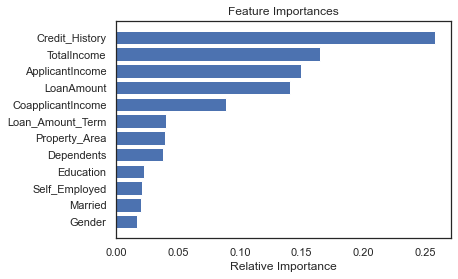

In [70]:
importances = pd.Series(random_forest.feature_importances_,index=X.columns)
#importances.plot(kind='barh', figsize=(12,8))
features=x_train.columns
indices = np.argsort(importances)

plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

__We can find out that 'Credit_History','Total Income' feature are most important. So, feature engineering helped us in predicting our target variable__

# Hypothesis Generation

Salary: Applicants with high income should have more chances of loan approval.

Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval.

Loan amount: Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

Loan term: Loan for less time period and less amount should have higher chances of approval.

# Coustmer segments for Home loan approval

1. Credit history as meets the guidelines are more likely to get their loans approved.

2. Proportion of loans getting approved for applicants having low Total_Income is very less as compared to that of applicants with Average, High and Very High Income.

3. Proportion of approved loans is higher for Low and Average Loan Amount as compared to that of High Loan Amount which supports our hypothesis in which we considered that the chances of loan approval will be high when the loan amount is less.

4. Proportion of loans getting approved in semiurban area is higher as compared to that in rural or urban areas

5. High chance of loan approved with less number of dependents.

6. Proportion of Graduate applicants is higher for the approved loans.